In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option('display.max_columns', None)

In [3]:

claims = pd.read_csv('CLAIM DETAILS.csv', encoding='utf-8')
policies = pd.read_csv('POLICY DETAILS.csv', encoding='ISO-8859-1')
print(claims.columns)
print(policies.columns)


C:\Users\user\AppData\Local\Temp\ipykernel_10564\1185848964.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  policies = pd.read_csv('POLICY DETAILS.csv', encoding='ISO-8859-1')


Index(['CUST_ID', 'DATE OF \r\nINTIMATION', 'DATE OF \r\nACCIDENT',
       'PLACE OF \r\nLOSS', 'CLAIM NO', 'AGE', 'TYPE',
       'DRIVING \r\nLICENSE ISSUE', 'BODY TYPE', 'MAKE', 'MODEL', 'YEAR',
       'CHASIS NO', 'REG', 'SUM INSURED', 'POLICY NO', 'POLICY START',
       'POLICY END', 'INTIMATED\r\nAMOUNT', 'INTIMATED\r\nSF', 'EXECUTIVE',
       'PRODUCT', 'POLICYTYPE', 'NATIONALITY'],
      dtype='object')
Index(['CUST_ID', 'EXECUTIVE', 'BODY', 'MAKE', 'MODEL', 'USE_OF_VEHICLE',
       'MODEL_YEAR', 'CHASSIS_NO', 'REGN', 'POLICY_NO', 'POL_EFF_DATE',
       'POL_EXPIRY_DATE', 'SUM INSURED', 'POL_ISSUE_DATE', 'PREMIUM2',
       'DRV_DOB', 'DRV_DLI', 'VEH_SEATS', 'PRODUCT', 'POLICYTYPE',
       'NATIONALITY'],
      dtype='object')


In [4]:
claims = claims.rename(columns={'POLICY NO': 'POLICY_NO'})

In [5]:
print(claims.MAKE.isna().sum())
print(claims.MAKE[claims.MAKE == "."].count())
claims = claims[~claims['MAKE'].isin(['.','..'])]
mean_insured = claims.groupby('MAKE')['SUM INSURED'].mean().to_dict()

values_array = np.array(list(mean_insured.values()))
keys_with_nan = [key for key, value in mean_insured.items() if pd.isna(value) or value == 0.0]
print(len(keys_with_nan))
print(keys_with_nan)
claims = claims[~claims['MAKE'].isin(keys_with_nan)]
mean_insured

0
314
16
['ACURA', 'BYD', 'CASE', 'CATERPILLAR', 'CITROEN', 'DOOSAN', 'FISKER', 'GODREJ', 'JCB', 'LANDMARK', 'MANITOU', 'ROVER', 'TADANO', 'TCM', 'TVS', 'XIAMEN']


{'ACURA': nan,
 'ALFA ROMEO': 109863.22222222222,
 'ASHOK LEYLAND': 55901.10344827586,
 'ASIASTAR': 581834.085106383,
 'ASTON MARTIN': 533057.1428571428,
 'AUDI': 164371.89142857143,
 'BAIC': 37262.35294117647,
 'BAJAJ': 21892.286995515697,
 'BENTLEY': 515240.6296296296,
 'BMW': 164920.89118607182,
 'BOBCAT': 93450.0,
 'BRILLIANCE': 35848.125,
 'BYD': nan,
 'CADILLAC': 194124.4644012945,
 'CASE': 0.0,
 'CATERPILLAR': 0.0,
 'CHANGAN': 37219.228070175435,
 'CHERY': 37486.58181818182,
 'CHEVROLET': 101994.90496304118,
 'CHRYSLER': 92845.14285714286,
 'CITROEN': nan,
 'CMC': 42298.13333333333,
 'CMC VERYCA': 35175.333333333336,
 'DAEWOO': 147260.0,
 'DAIHATSU': 45622.98105263158,
 'DFSK': 39498.92857142857,
 'DODGE': 108850.31306990882,
 'DOMY': 63934.333333333336,
 'DONG': 91000.0,
 'DOOSAN': nan,
 'EICHER': 186000.0,
 'FAW': 37000.0,
 'FERRARI': 885128.75,
 'FIAT': 41000.0,
 'FISKER': nan,
 'FORD': 63473.52682497801,
 'FOTON': 47195.72192513369,
 'GAC': 69213.47368421052,
 'GEELY': 37191

In [6]:

claims['SUM INSURED'] = claims.apply(lambda row: mean_insured.get(row['MAKE']) if pd.isna(
    row['SUM INSURED']) or row['SUM INSURED'] == 0.0 or row['SUM INSURED']<5000.0  else row['SUM INSURED'], axis=1)
print(claims['SUM INSURED'].isna().sum())

claims = claims[claims['SUM INSURED'] <= 2000000]
print(claims[claims['SUM INSURED'] > 1000000])
print(claims['SUM INSURED'].describe())

0
       CUST_ID DATE OF \r\nINTIMATION DATE OF \r\nACCIDENT PLACE OF \r\nLOSS  \
805       1965       07/04/2015 14:25           03/04/2015             DUBAI   
897       1965       21/04/2015 13:17           16/04/2015             DUBAI   
898       6656       21/04/2015 15:00           25/03/2015             DUBAI   
954       3304       28/04/2015 14:08           21/04/2015             DUBAI   
1536      1965        15/06/2015 7:47           03/06/2015             DUBAI   
...        ...                    ...                  ...               ...   
61580     7463       13/10/2020 11:35           19/09/2020             DUBAI   
61595     7463       13/10/2020 18:03           19/09/2020             Dubai   
61618     7463       15/10/2020 15:43           16/08/2020             DUBAI   
62142     3202       25/11/2020 16:43           19/11/2020          FUJAIRAH   
62177    13803       30/11/2020 11:21           20/11/2020             DUBAI   

                     CLAIM NO   AGE  

) missing from current font.g\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


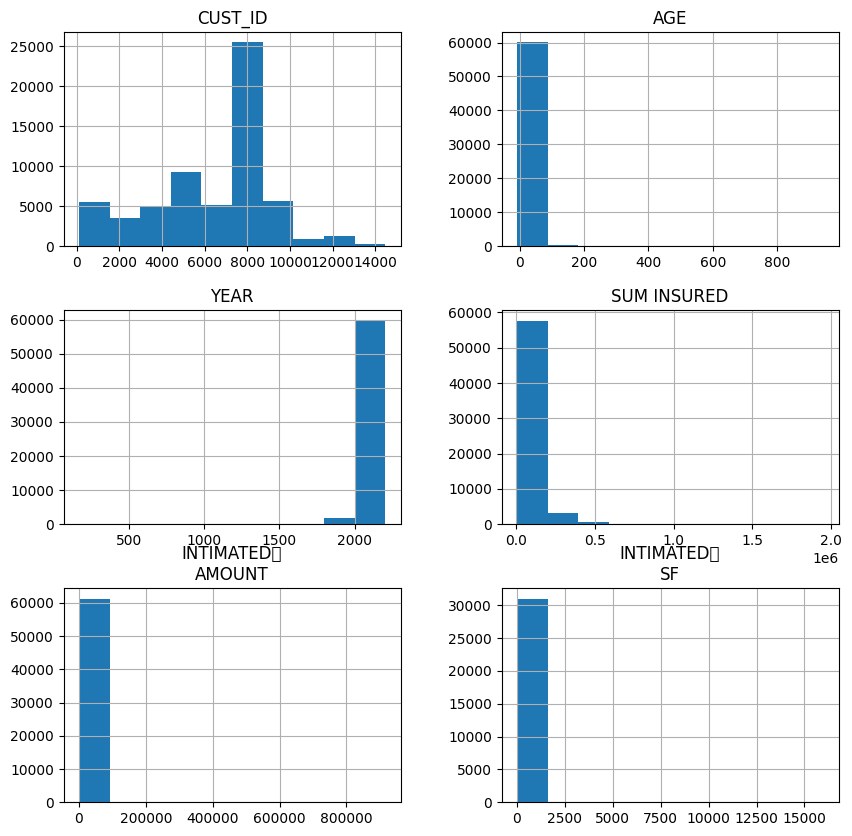

In [7]:
claims.hist(figsize=(10, 10))
plt.show()

In [8]:
print(claims.describe())
claims[claims['INTIMATED\r\nAMOUNT'] == 0]

            CUST_ID           AGE          YEAR   SUM INSURED  \
count  61752.000000  60263.000000  61487.000000  6.175200e+04   
mean    6366.555334     29.393923   2011.426367  8.111470e+04   
std     2804.772038     17.427674      9.072728  9.855963e+04   
min      106.000000     -9.000000    170.000000  5.000000e+03   
25%     4714.000000     23.000000   2008.000000  3.500000e+04   
50%     7788.000000     31.000000   2013.000000  5.696401e+04   
75%     8045.000000     39.000000   2015.000000  9.465900e+04   
max    14461.000000    944.000000   2203.000000  1.950000e+06   

       INTIMATED\r\nAMOUNT  INTIMATED\r\nSF  
count         61567.000000     31109.000000  
mean           5806.981631       219.706082  
std           17298.212871       250.074306  
min               0.000000         0.000000  
25%            1130.000000       150.000000  
50%            2500.000000       150.000000  
75%            5000.000000       300.000000  
max          916073.000000     15982.000000  


,CUST_ID,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,DRIVING \r\nLICENSE ISSUE,BODY TYPE,MAKE,MODEL,YEAR,CHASIS NO,REG,SUM INSURED,POLICY_NO,POLICY START,POLICY END,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,EXECUTIVE,PRODUCT,POLICYTYPE,NATIONALITY
19,3290,06/01/2015 13:38,22/12/2014,DUBAI,DU/10/PC/COMP/1789/15,57.0,TP Claim,01/01/1900,SALOON,CADILLAC,XTS,2013.0,2G6185S3XD9137933,DUBAI,220000.000000,102044365,18/02/2014,17/03/2015,0.0,NaN,JAIKISHIN (S),STANDARD,COMP,NaN
28,5012,07/01/2015 15:31,05/01/2015,DUBAI,DU/10/PC/COMP/1798/15,33.0,OD Claim,01/01/1900,SALOON,NISSAN,ALTIMA,2008.0,1N4AL21D18C141099,DUBAI,23000.000000,102045994,20/07/2014,19/07/2015,0.0,0.0,JAIKISHIN,NOT CLASSIFIED,COMP,NaN
44,3109,11/01/2015 13:25,03/12/2014,DUBAI,DU/10/PC/TP/1814/15,38.0,TP Claim,01/01/1900,MOTOR CYCLE,BAJAJ,PULSAR,2014.0,MD2A11CZ2EWC43635,TBR,21892.286996,101508291,05/08/2014,04/09/2015,0.0,NaN,MANOHAR (S),NOT CLASSIFIED,TP,NaN
77,5568,13/01/2015 10:59,10/01/2015,DUBAI,DU/10/PC/COMP/1847/15,NaN,OD Claim,01/01/1900,SPORTS CAR,PORSCHE,CAYMAN,2015.0,WP0ZZZ98ZFK161031,TBR,262060.000000,102047043,17/09/2014,16/10/2015,0.0,NaN,BR,M 2.25,COMP,NaN
79,5905,13/01/2015 14:59,19/10/2014,DUBAI,DU/10/PC/COMP/1848/15,28.0,RECOVERY CLAIM,01/01/1900,SALOON,NISSAN,SUNNY,2014.0,MDHBN7ADXEG508477,TBR,43000.000000,102043601,26/12/2013,25/01/2015,0.0,0.0,AJITH,NOT CLASSIFIED,COMP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57971,5495,04/12/2019 10:19,07/10/2019,SHARJAH,OMIT,34.0,TP Claim,01/01/1900,SUV,VOLKSWAGEN,TERAMONT,2018.0,WVGDG2CA9JC572807,DUBAI,167900.000000,102123639,16/10/2018,15/11/2019,0.0,0.0,BR,M 2.5,COMP,EMIRATE
58117,6656,12/12/2019 12:18,31/10/2019,DUBAI,DU/10/PC/COMP/3838/20,0.0,TP Claim Ins,01/01/1900,SALOON,MITSUBISHI,ATRRAGE,2019.0,MMDAF26J2KH004863,DUBAI,36645.000000,102126765,29/01/2019,28/02/2020,0.0,NaN,BR,M 2019,COMP,PAKISTANI
59259,7957,01/03/2020 9:00,26/02/2020,DUBAI,OMIT,30.0,RECOVERY CLAIM,02/01/2008,SALOON,TOYOTA,CAMRY,2019.0,JTNBZ4HK5K3011567,SHJ,110000.000000,102137148,30/10/2019,29/11/2020,0.0,0.0,BR,M 2019,COMP,EMIRATE
60257,7957,21/06/2020 10:03,07/03/2020,Dubai,OMIT,30.0,RECOVERY CLAIM,18/09/2019,SALOON,NISSAN,TIIDA,2011.0,3N1BC1A88BL355338,DUBAI,13149.000000,102137319,05/11/2019,04/12/2020,0.0,0.0,BR,M 2019,COMP,INDIAN


In [9]:
print(claims['DATE OF \r\nINTIMATION'].isna().sum())

0


In [10]:
claims.loc[(claims['INTIMATED\r\nAMOUNT'].isna()) | (claims['INTIMATED\r\nAMOUNT'] < 50.0), 'INTIMATED\r\nAMOUNT'].count()

2612

In [11]:
mean_intimated_make = claims.groupby('MAKE')['INTIMATED\r\nAMOUNT'].mean().to_dict()

# Check if any values in the dictionary are less than 50
values_less_than_50 = any(value < 50 for value in mean_intimated_make.values())

if values_less_than_50:
    print("The dictionary contains values less than 50.")
else:
    print("All values in the dictionary are 50 or greater.")


The dictionary contains values less than 50.


In [12]:
mean_intimated_make = claims.groupby('MAKE')['INTIMATED\r\nAMOUNT'].mean().to_dict()

# Identify rows with NaN or values less than 50 in 'INTIMATED\r\nAMOUNT'
condition = (claims['INTIMATED\r\nAMOUNT'].isna()) | (claims['INTIMATED\r\nAMOUNT'] < 50)

# Replace values with the corresponding mean based on 'MAKE'
claims.loc[condition, 'INTIMATED\r\nAMOUNT'] = claims.loc[condition, 'MAKE'].map(mean_intimated_make)
claims.loc[(claims['INTIMATED\r\nAMOUNT'].isna()) | (claims['INTIMATED\r\nAMOUNT'] < 50.0), 'INTIMATED\r\nAMOUNT'].count()

2

In [13]:
print(claims['INTIMATED\r\nAMOUNT'].describe())

count     61752.000000
mean       6055.023166
std       17268.347577
min           0.000000
25%        1300.000000
50%        2800.000000
75%        5390.000000
max      916073.000000
Name: INTIMATED\r\nAMOUNT, dtype: float64


In [14]:
policies.head(3)


,CUST_ID,EXECUTIVE,BODY,MAKE,MODEL,USE_OF_VEHICLE,MODEL_YEAR,CHASSIS_NO,REGN,POLICY_NO,POL_EFF_DATE,POL_EXPIRY_DATE,SUM INSURED,POL_ISSUE_DATE,PREMIUM2,DRV_DOB,DRV_DLI,VEH_SEATS,PRODUCT,POLICYTYPE,NATIONALITY
0,749,JAIKISHIN (S),SALOON,TOYOTA,AVALON,PRIVATE,2004.0,4T1BF28B74U386791,DUBAI,102048936,24/02/2015,23/02/2016,14080.0,04/01/2015 8:14,1090.0,NaN,NaN,4.0,NOT CLASSIFIED,COMP,NaN
1,749,JAIKISHIN (S),PICK UP,MITSUBISHI,CANTER SINGLE CABIN,COMMERCIAL,2004.0,JL7BCE1K44K002036,DUBAI,101509203,10/02/2015,09/02/2016,0.0,04/01/2015 8:15,930.0,NaN,NaN,2.0,NOT CLASSIFIED,TP,NaN
2,749,JAIKISHIN (S),SALOON,TOYOTA,YARIS,PRIVATE,2007.0,JTDBW923371044730,DUBAI,101509204,14/02/2015,13/02/2016,NaN,04/01/2015 8:26,640.0,NaN,NaN,4.0,TP,TP,NaN


In [15]:
claims.head(3)

,CUST_ID,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,DRIVING \r\nLICENSE ISSUE,BODY TYPE,MAKE,MODEL,YEAR,CHASIS NO,REG,SUM INSURED,POLICY_NO,POLICY START,POLICY END,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,EXECUTIVE,PRODUCT,POLICYTYPE,NATIONALITY
0,5029,04/01/2015 12:52,28/12/2014,DUBAI,DU/10/PCV/COMP/1770/15,33.0,OD Claim,01/01/1900,MINI BUS,TOYOTA,HIACE,2013.0,JTGJX02P9D0047479,DUBAI,82000.0,102043771,20/02/2014,19/02/2015,11800.0,500.0,MANOHAR,NOT CLASSIFIED,COMP,NaN
1,5029,04/01/2015 13:20,28/12/2014,DUBAI,DU/10/PCV/COMP/1771/15,33.0,TP Claim,01/01/1900,MINI BUS,TOYOTA,HIACE,2013.0,JTGJX02P9D0047479,DUBAI,82000.0,102043771,20/02/2014,19/02/2015,21750.0,NaN,MANOHAR,NOT CLASSIFIED,COMP,NaN
2,6778,04/01/2015 15:58,22/12/2014,DUBAI,DU/10/PC/COMP/1772/15,30.0,OD Claim,01/01/1900,SALOON,AUDI,A 8L,2013.0,WAUR2BFD8DN020302,DUBAI,280000.0,102045538,16/06/2014,15/06/2015,8200.0,300.0,NELSON,M 2.5,COMP,NaN


In [16]:
#rename the YEAR column to MODEL_YEAR
claims = claims.rename(columns={'YEAR': 'MODEL_YEAR', 'BODY TYPE': 'BODY', 'CHASIS NO': 'CHASSIS_NO','DRIVING \r\nLICENSE ISSUE':'DRV_DLI'})

policies.rename(columns={'REGN': 'REG' , 'POL_EFF_DATE': 'POLICY START' ,'POL_EXPIRY_DATE':'POLICY END' }, inplace=True)
claims.columns

Index(['CUST_ID', 'DATE OF \r\nINTIMATION', 'DATE OF \r\nACCIDENT',
       'PLACE OF \r\nLOSS', 'CLAIM NO', 'AGE', 'TYPE', 'DRV_DLI', 'BODY',
       'MAKE', 'MODEL', 'MODEL_YEAR', 'CHASSIS_NO', 'REG', 'SUM INSURED',
       'POLICY_NO', 'POLICY START', 'POLICY END', 'INTIMATED\r\nAMOUNT',
       'INTIMATED\r\nSF', 'EXECUTIVE', 'PRODUCT', 'POLICYTYPE', 'NATIONALITY'],
      dtype='object')

In [17]:
df_merged = pd.merge(policies, claims, on='POLICY_NO', how='outer')
print(df_merged.columns)

Index(['CUST_ID_x', 'EXECUTIVE_x', 'BODY_x', 'MAKE_x', 'MODEL_x',
       'USE_OF_VEHICLE', 'MODEL_YEAR_x', 'CHASSIS_NO_x', 'REG_x', 'POLICY_NO',
       'POLICY START_x', 'POLICY END_x', 'SUM INSURED_x', 'POL_ISSUE_DATE',
       'PREMIUM2', 'DRV_DOB', 'DRV_DLI_x', 'VEH_SEATS', 'PRODUCT_x',
       'POLICYTYPE_x', 'NATIONALITY_x', 'CUST_ID_y', 'DATE OF \r\nINTIMATION',
       'DATE OF \r\nACCIDENT', 'PLACE OF \r\nLOSS', 'CLAIM NO', 'AGE', 'TYPE',
       'DRV_DLI_y', 'BODY_y', 'MAKE_y', 'MODEL_y', 'MODEL_YEAR_y',
       'CHASSIS_NO_y', 'REG_y', 'SUM INSURED_y', 'POLICY START_y',
       'POLICY END_y', 'INTIMATED\r\nAMOUNT', 'INTIMATED\r\nSF', 'EXECUTIVE_y',
       'PRODUCT_y', 'POLICYTYPE_y', 'NATIONALITY_y'],
      dtype='object')


In [18]:



# List to store the differences
differences = []

# Iterate over columns
for col_x, col_y in zip(df_merged.filter(like='_x').columns, df_merged.filter(like='_y').columns):
    # Calculate unique values difference
    unique_values_diff = set(df_merged[col_x].dropna().unique()) - set(df_merged[col_y].dropna().unique())
    
    # Calculate NaNs difference
    nan_count_diff = df_merged[col_x].isna().sum() - df_merged[col_y].isna().sum()
    
    # Append differences to the list
    differences.append({
        'Column': col_x[:-2],  # Remove the '_x' suffix for better readability
        'Unique_Values_Diff': unique_values_diff,
        'NaN_Count_Diff': nan_count_diff
    })

# Create a DataFrame from the differences list
differences_df = pd.DataFrame(differences)

# Print or inspect the differences DataFrame
differences_df




,Column,Unique_Values_Diff,NaN_Count_Diff
0,CUST_ID,"{8192.0, 8194.0, 8196.0, 8197.0, 8199.0, 8200....",-184864
1,EXECUTIVE,"{RAHEEM/WA, HABEEB/AZM, SAXENA, RENNIE/AJI, JA...",-185605
2,BODY,"{MOTOR TRICYCLE, WHEEL LOADER, TRUCK HEAD, SAL...",-174590
3,MAKE,"{SAIBAO, HC, CROWN, HAMM, CHERRINGTON, BONLUCK...",-174590
4,MODEL,"{PERSONA, TERRACAN, QUTE, WINDSTAR, MG 550, KI...",-174423
5,MODEL_YEAR,"{2.0, 135.0, 8.0, 140.0, 9999.0, 2065.0, 150.0...",-174598
6,CHASSIS_NO,"{1HGCP2638CA617104, 1HGCS1270CA600282, 6T1BE32...",-174590
7,REG,"{ABU DHABI , ABU DHABI, DUBAI K, DUBAI M, RAK...",-174588
8,POLICY START,"{25/05/2019, 10/05/2019, 18/12/2018, 24/06/201...",-184864
9,POLICY END,"{28/02/2021, 12/12/2021, 10/05/2019, 30/01/202...",-184864


In [19]:
columns_to_merge = ['CUST_ID', 'EXECUTIVE', 'MAKE' ,'DRV_DLI', 'MODEL' , 'SUM INSURED' , 'PRODUCT', 'POLICYTYPE' , 'NATIONALITY','BODY','REG','POLICY START','POLICY END','CHASSIS_NO','MODEL_YEAR']

for col in columns_to_merge:
    # Create a new column by combining '_x' and '_y' columns
    df_merged[col] = df_merged[f'{col}_x'].combine_first(df_merged[f'{col}_y'])

    # Drop the original '_x' and '_y' columns
    df_merged = df_merged.drop(columns=[f'{col}_x', f'{col}_y'])

# Print or inspect the DataFrame
df_merged

,USE_OF_VEHICLE,POLICY_NO,POL_ISSUE_DATE,PREMIUM2,DRV_DOB,VEH_SEATS,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,CUST_ID,EXECUTIVE,MAKE,DRV_DLI,MODEL,SUM INSURED,PRODUCT,POLICYTYPE,NATIONALITY,BODY,REG,POLICY START,POLICY END,CHASSIS_NO,MODEL_YEAR
0,PRIVATE,102048936,04/01/2015 8:14,1090.0,NaN,4.0,18/03/2015 9:07,11/03/2015,DUBAI,DU/10/PC/COMP/2328/15,26.0,OD Claim,550.00000,0.0,749.0,JAIKISHIN (S),TOYOTA,01/01/1900,AVALON,14080.000000,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,24/02/2015,23/02/2016,4T1BF28B74U386791,2004.0
1,PRIVATE,102048936,04/01/2015 8:14,1090.0,NaN,4.0,24/06/2015 17:01,15/06/2015,DUBAI,DU/10/PC/COMP/0922/16,31.0,RECOVERY CLAIM,900.00000,0.0,749.0,JAIKISHIN (S),TOYOTA,22/11/2011,AVALON,14080.000000,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,24/02/2015,23/02/2016,4T1BF28B74U386791,2004.0
2,PRIVATE,102048936,04/01/2015 8:14,1090.0,NaN,4.0,07/01/2016 11:27,11/03/2015,DUBAI,DU/10/PC/COMP/5818/16,26.0,TP Claim,1700.00000,NaN,749.0,JAIKISHIN (S),TOYOTA,01/01/1900,AVALON,14080.000000,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,24/02/2015,23/02/2016,4T1BF28B74U386791,2004.0
3,PRIVATE,102048936,04/01/2015 8:14,1090.0,NaN,4.0,14/03/2016 16:14,11/03/2015,DUBAI,OMIT,26.0,TP Claim,4522.63967,NaN,749.0,JAIKISHIN (S),TOYOTA,01/01/1900,AVALON,14080.000000,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,24/02/2015,23/02/2016,4T1BF28B74U386791,2004.0
4,COMMERCIAL,101509203,04/01/2015 8:15,930.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.0,JAIKISHIN (S),MITSUBISHI,NaN,CANTER SINGLE CABIN,0.000000,NOT CLASSIFIED,TP,NaN,PICK UP,DUBAI,10/02/2015,09/02/2016,JL7BCE1K44K002036,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248933,NaN,102042682,NaN,NaN,NaN,NaN,30/09/2018 11:07,06/02/2014,DUBAI,DU/10/PCV/COMP/4094/19,40.0,TP Claim,917.00000,NaN,250.0,JAIKISHIN (SNC),NISSAN,01/01/1900,E 25 VAN,17600.000000,NOT CLASSIFIED,COMP,PAKISTANI,VAN,DUBAI,16/11/2013,15/11/2014,JN6FE52S57X421878,2007.0
248934,NaN,101505111,NaN,NaN,NaN,NaN,07/08/2019 10:49,28/05/2013,SHARJAH,DU/10/MCY/TP/1955/20,0.0,TP Claim Ins,3000.00000,NaN,3109.0,MANOHAR (S),BAJAJ,01/01/1900,CT100,21892.286996,NOT CLASSIFIED,TP,PAKISTANI,MOTOR CYCLE,TBR,18/09/2012,17/10/2013,MD2DDDUZZVW80161,2012.0
248935,NaN,102041951,NaN,NaN,NaN,NaN,07/08/2019 11:03,29/04/2014,DUBAI,DU/10/PC/COMP/1956/20,0.0,TP Claim Ins,3600.00000,NaN,2245.0,MANOHAR (S),MITSUBISHI,01/01/1900,LANCER,12000.000000,NOT CLASSIFIED,COMP,PAKISTANI,SALOON,DUBAI,12/08/2013,11/08/2014,JMYSRCS1A7U729899,2007.0
248936,NaN,102046700,NaN,NaN,NaN,NaN,24/06/2020 8:55,19/10/2014,DUBAI,DU/10/PCV/COMP/0627/21,0.0,TP Claim Ins,3780.00000,NaN,6764.0,AJITH,TOYOTA,01/01/1900,HILUX,32000.000000,NOT CLASSIFIED,COMP,PAKISTANI,PICK UP,DUBAI,29/09/2014,28/09/2015,MR0EW12G2B2030176,2011.0


In [20]:
# Plot histograms for numerical columns
# df_merged.hist(figsize=(10, 10))
# plt.show()

#Plot count plots 
#for categorical columns
# sns.countplot(x='SUM INSURED', data=df_merged)
# plt.show()


In [21]:
#MODEL_YEAR cleaning
df_merged['MODEL_YEAR'].mean()
print(df_merged[df_merged['MODEL_YEAR'] == 2010].count())
#8000 row have 2010 as model year

USE_OF_VEHICLE            7995
POLICY_NO                 8159
POL_ISSUE_DATE            7999
PREMIUM2                  7999
DRV_DOB                   7153
VEH_SEATS                 7999
DATE OF \r\nINTIMATION    2264
DATE OF \r\nACCIDENT      2264
PLACE OF \r\nLOSS         2264
CLAIM NO                  2263
AGE                       2193
TYPE                      2261
INTIMATED\r\nAMOUNT       2264
INTIMATED\r\nSF           1049
CUST_ID                   8159
EXECUTIVE                 8159
MAKE                      8159
DRV_DLI                   7591
MODEL                     8126
SUM INSURED               5386
PRODUCT                   8159
POLICYTYPE                8159
NATIONALITY               2104
BODY                      8155
REG                       8159
POLICY START              8159
POLICY END                8159
CHASSIS_NO                8159
MODEL_YEAR                8159
dtype: int64


In [22]:

# Assuming df_merged is your merged DataFrame
# Replace missing values in 'MODEL_YEAR' with the mean of the column
mean_model_year = df_merged['MODEL_YEAR'].mean()
df_merged['MODEL_YEAR'] = df_merged['MODEL_YEAR'].fillna(mean_model_year)

# Define the range around the mean
range_around_mean = 5
min_model_year = 1950
max_model_year = 2022

# Define a list of random values within the specified range around the mean
random_values = list(range(int(mean_model_year - range_around_mean), int(mean_model_year + range_around_mean) + 1))

# Function to replace values outside the desired range with a random value
def replace_outside_range(x):
    if pd.isnull(x) or x < min_model_year or x > max_model_year:
        return random.choice(random_values)
    else:
        return x

# Apply the function to the 'MODEL_YEAR' column
df_merged['MODEL_YEAR'] = df_merged['MODEL_YEAR'].apply(replace_outside_range)

# Print or inspect the DataFrame to verify changes
print(df_merged)



       USE_OF_VEHICLE  POLICY_NO   POL_ISSUE_DATE  PREMIUM2 DRV_DOB  \
0             PRIVATE  102048936  04/01/2015 8:14    1090.0     NaN   
1             PRIVATE  102048936  04/01/2015 8:14    1090.0     NaN   
2             PRIVATE  102048936  04/01/2015 8:14    1090.0     NaN   
3             PRIVATE  102048936  04/01/2015 8:14    1090.0     NaN   
4          COMMERCIAL  101509203  04/01/2015 8:15     930.0     NaN   
...               ...        ...              ...       ...     ...   
248933            NaN  102042682              NaN       NaN     NaN   
248934            NaN  101505111              NaN       NaN     NaN   
248935            NaN  102041951              NaN       NaN     NaN   
248936            NaN  102046700              NaN       NaN     NaN   
248937            NaN  101506118              NaN       NaN     NaN   

        VEH_SEATS DATE OF \r\nINTIMATION DATE OF \r\nACCIDENT  \
0             4.0        18/03/2015 9:07           11/03/2015   
1             4.0

In [23]:
print(df_merged[df_merged['MODEL_YEAR'] == 2010].count())
print(df_merged['MODEL_YEAR'].isna().sum())
#now Model_YEar is clean

USE_OF_VEHICLE            7997
POLICY_NO                 8161
POL_ISSUE_DATE            8001
PREMIUM2                  8001
DRV_DOB                   7154
VEH_SEATS                 8001
DATE OF \r\nINTIMATION    2264
DATE OF \r\nACCIDENT      2264
PLACE OF \r\nLOSS         2264
CLAIM NO                  2263
AGE                       2193
TYPE                      2261
INTIMATED\r\nAMOUNT       2264
INTIMATED\r\nSF           1049
CUST_ID                   8161
EXECUTIVE                 8161
MAKE                      8161
DRV_DLI                   7592
MODEL                     8128
SUM INSURED               5387
PRODUCT                   8161
POLICYTYPE                8161
NATIONALITY               2104
BODY                      8157
REG                       8161
POLICY START              8161
POLICY END                8161
CHASSIS_NO                8161
MODEL_YEAR                8161
dtype: int64
0


In [24]:
#for premium
df_merged['PREMIUM2'].describe()
print(df_merged.PREMIUM2.isna().sum())

2326


In [25]:
#transform all negative values into positive
# Assuming df_merged is your merged DataFrame

# Function to transform negative values to positive
def transform_negative_premium(x):
    return abs(x)  

# Apply the function to the 'PREMIUM' column
df_merged['PREMIUM2'] = df_merged['PREMIUM2'].apply(transform_negative_premium)




In [26]:
# Assuming df_merged is your merged DataFrame

# Calculate the mean of the 'PREMIUM' column
mean_premium = df_merged['PREMIUM2'].mean()

# Replace values less than 200 with NaN
condition = (df_merged['PREMIUM2'] < 200) | (df_merged['PREMIUM2'] == 0 | df_merged.PREMIUM2.isna())
df_merged.loc[condition, 'PREMIUM2'] = mean_premium

# Fill NaN values with the mean of the column
# df_merged['PREMIUM2'] = df_merged['PREMIUM2'].fillna(mean_premium)

print(df_merged.PREMIUM2.isna().sum())
print(df_merged.PREMIUM2.describe())


2326
count    246612.000000
mean       1653.221935
std        3641.792918
min         200.000000
25%         450.000000
50%        1115.000000
75%        1850.000000
max      457085.000000
Name: PREMIUM2, dtype: float64


In [27]:
#veh seats
print(df_merged['VEH_SEATS'].describe())
df_merged[df_merged.VEH_SEATS == 0]
#it looks like most records with 0 vehicle seats are either forklifters or motorcycles so I will change them to 1
print(df_merged.VEH_SEATS.isna().sum())
#we have 12 000 na rows
df_merged[df_merged.VEH_SEATS == 3]

count    236348.000000
mean          4.457364
std           3.340507
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          87.000000
Name: VEH_SEATS, dtype: float64
12590


,USE_OF_VEHICLE,POLICY_NO,POL_ISSUE_DATE,PREMIUM2,DRV_DOB,VEH_SEATS,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,CUST_ID,EXECUTIVE,MAKE,DRV_DLI,MODEL,SUM INSURED,PRODUCT,POLICYTYPE,NATIONALITY,BODY,REG,POLICY START,POLICY END,CHASSIS_NO,MODEL_YEAR
64,PRIVATE,102048979,05/01/2015 13:32,1712.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7134.0,BR,FORD,NaN,MUSTANG,44000.0,STANDARD,COMP,NaN,SPORTS CAR,DUBAI,05/01/2015,04/02/2016,1ZVBP8EN4A5107948.,2010.0
101,PRIVATE,102049002,06/01/2015 9:58,4040.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5445.0,ASHOK,PORSCHE,NaN,CARRERA,126000.0,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,10/01/2015,09/01/2016,WP0ZZZ99Z8S722946,2008.0
132,PRIVATE,102049022,06/01/2015 16:03,4665.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7650.0,JOHN,MERCEDES,NaN,E350,135000.0,STANDARD,COMP,NaN,COUPE,DUBAI,06/01/2015,05/02/2016,WDDKK5KF7CF138966,2012.0
152,PRIVATE,101509224,07/01/2015 9:12,1210.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5568.0,BR,MERCEDES,NaN,CLK-320,NaN,TP,TP,NaN,SALOON,DUBAI,07/01/2015,06/02/2016,WDBTK65G04T033356,2004.0
242,PRIVATE,102049092,11/01/2015 9:33,4160.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3609.0,JAIKISHIN,PORSCHE,NaN,CARRERA,120000.0,NOT CLASSIFIED,COMP,NaN,SALOON,DUBAI,17/02/2015,16/02/2016,WP0ZZZ99Z9S700350,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246193,PRIVATE,102153246,22/12/2020 11:52,6187.0,01/01/2000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11997.0,JAIKISHIN (S),BENTLEY,01/01/1970,CONTINENTAL COUPE,294400.0,M 2.25,COMP,EMIRATE,COUPE,DUBAI,28/02/2021,30/03/2022,SCBFN6ZA2FC044067,2015.0
246324,PRIVATE,102153347,24/12/2020 10:04,5267.0,12/11/2010,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4522.0,AMIT,BENTLEY,01/01/1970,CONTINENTAL GTC V8,191890.0,M 2.5,COMP,COMPANY,SPORTS CAR,DUBAI,29/12/2020,28/01/2022,SCBGN2ZA4EC088647,2014.0
246338,PRIVATE,102153361,24/12/2020 11:28,1390.0,13/02/2014,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9446.0,MANOHAR,MINI,31/08/1985,COOPER,34000.0,STANDARD,COMP,INDIAN,COUPE,DUBAI,29/12/2020,28/01/2022,WMWXM5101F3A15130,2015.0
246417,PRIVATE,102153428,27/12/2020 17:51,1992.0,10/11/2001,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4267.0,BR,PORSCHE,18/09/1983,PANAMERA,111200.0,M 2019,COMP,INDIAN,SALOON,DUBAI,27/12/2020,26/01/2022,WP0ZZZ97ZEL001269,2014.0


In [28]:
df_merged.BODY.isna().sum()
# Assuming df_merged is your merged DataFrame

# Drop all rows where 'BODY' is NaN
df_merged = df_merged.dropna(subset=['BODY'])



In [29]:
# Assuming df_merged is your merged DataFrame

# Create a mapping dictionary with 'BODY' as keys and corresponding max 'VEH_SEATS' as values
max_seats_mapping = df_merged.groupby('BODY')['VEH_SEATS'].max().to_dict()

# Replace 'VEH_SEATS' values of 0 with 1 in the mapping dictionary
max_seats_mapping = {key: 1 if value == 0 else value for key, value in max_seats_mapping.items()}


# Print or inspect the DataFrame
max_seats_mapping




{'4 WD': 87.0,
 'AMPHIBIOUS BUS': 45.0,
 'AS PER FLEET LIST': 6.0,
 'BUS': 83.0,
 'CARAVAN': 8.0,
 'CHILLER VAN': 3.0,
 'CONVERTIBLE': 4.0,
 'COUPE': 4.0,
 'CRANE': 1.0,
 'DOOR COUPE': 3.0,
 'DOUBLE CABIN': 5.0,
 'DRILL': 1.0,
 'DUMP TRUCK': 2.0,
 'EXCAVATOR': 1.0,
 'FORK LIFT': 1.0,
 'FREEZER PICK-UP': 6.0,
 'FREEZER TRUCK': 2.0,
 'FREEZER VAN': 14.0,
 'HATCH BACK': 6.0,
 'HEAVY TRUCK': 1.0,
 'JEEP': 4.0,
 'LIGHT PICKUP': 14.0,
 'LIMOUSINE': 14.0,
 'LOADER': 1.0,
 'LUXURY PICKUP': 7.0,
 'MICRO BUS 15 Seats': 14.0,
 'MINI BUS': 60.0,
 'MINI TRUCK': 1.0,
 'MINI VAN': 62.0,
 'MOTOR BIKE': 1.0,
 'MOTOR CYCLE': 4.0,
 'MOTOR GRADER': 1.0,
 'MOTOR HOME': 7.0,
 'MOTOR TRICYCLE': 3.0,
 'MPV': 8.0,
 'PICK UP': 14.0,
 'PICK UP (REEFER BODY)': 2.0,
 'PICK UP DOUBLE CABIN': 6.0,
 'PICK UP TRUCK': 6.0,
 'PICK UP WITH BOX': 6.0,
 'PICK UP WITH CRANE': 6.0,
 'PICKUP WITH BOX & TAIL LIFT': 2.0,
 'PICKUP WITH TIPPER': 2.0,
 'PIPELAYER': 1,
 'QUAD BIKE': 1.0,
 'RECOVERY VEHICLE': 2.0,
 'REFRIGERATED PIC

In [30]:

# Fill NaN and 0 values in 'VEH_SEATS' with the corresponding max value based on 'BODY'
condition = (df_merged['VEH_SEATS'].isna()) | (df_merged['VEH_SEATS'] == 0)
df_merged.loc[condition, 'VEH_SEATS'] = df_merged.loc[condition, 'BODY'].map(max_seats_mapping)

# Print or inspect the DataFrame to verify changes
print(df_merged.VEH_SEATS.isna().sum())
print(df_merged.VEH_SEATS.describe())




0
count    238559.000000
mean          4.938003
std           6.268546
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          87.000000
Name: VEH_SEATS, dtype: float64


In [31]:
# Convert the 'DRV_DOB' and 'DRV_DLI' columns to datetime objects with the correct format
df_merged.loc[:, 'DRV_DOB'] = pd.to_datetime(df_merged['DRV_DOB'], format='%d/%m/%Y', errors='coerce')
df_merged.loc[:, 'DRV_DLI'] = pd.to_datetime(df_merged['DRV_DLI'], format='%d/%m/%Y', errors='coerce')

# Count the number of rows where 'DRV_DOB' is greater than 'DRV_DLI'
count_rows = len(df_merged[df_merged['DRV_DOB'] > df_merged['DRV_DLI']])

# Calculate the percentage
total_rows = len(df_merged)
percentage = (count_rows / total_rows) * 100

# Print or use the percentage as needed
print("Percentage of rows where DRV_DOB > DRV_DLI:", percentage)


Percentage of rows where DRV_DOB > DRV_DLI: 87.79505279616363


In [32]:
#it looks like we have 89% of our data with DRV_DOB > DRV_DLI
# Rename columns
df_merged = df_merged.rename(columns={'DRV_DOB': 'DRV_DLI', 'DRV_DLI': 'DRV_DOB'})


In [33]:
age_df = df_merged[df_merged.AGE < 18][['AGE' , 'DRV_DOB', 'DATE OF \r\nINTIMATION']]
age_df[age_df.AGE>0 | ~age_df.DRV_DOB.isna()]

,AGE,DRV_DOB,DATE OF \r\nINTIMATION
3832,16.0,1900-01-01 00:00:00,18/10/2015 13:11
6023,14.0,1900-01-01 00:00:00,24/05/2016 10:06
6748,15.0,1900-01-01 00:00:00,14/03/2016 18:22
15104,16.0,1990-05-27 00:00:00,04/10/2015 12:39
21123,17.0,1975-01-01 00:00:00,21/03/2016 16:51
65798,16.0,1965-03-15 00:00:00,25/12/2016 16:13
107331,5.0,1980-01-01 00:00:00,02/08/2016 8:24
108551,3.0,1970-01-01 00:00:00,12/07/2016 8:23
164660,17.0,1990-04-02 00:00:00,21/01/2018 8:52
170525,16.0,1970-01-01 00:00:00,16/08/2017 13:16


In [34]:
print(df_merged.DRV_DOB.isna().sum())
print(df_merged['DATE OF \r\nINTIMATION'].isna().sum())


12295
176882


In [35]:
# Assuming df is your DataFrame
# Convert 'DRV_DOB' and 'DATE OF INTIMATION' to datetime if not already
df_merged['DRV_DOB'] = pd.to_datetime(df_merged['DRV_DOB'], errors='coerce')
df_merged['DATE OF \r\nINTIMATION'] = pd.to_datetime(df_merged['DATE OF \r\nINTIMATION'], errors='coerce')

# Calculate the age using the formula
df_merged['Calculated Age'] = (df_merged['DATE OF \r\nINTIMATION'] - df_merged['DRV_DOB']).dt.days // 365.25

# Count the number of rows where 'Calculated Age' is not null
valid_age_rows = df_merged.dropna(subset=['Calculated Age'], how='any')

# Calculate the percentage of rows with valid ages
percentage_valid_age = (len(valid_age_rows) / len(df_merged)) * 100

print(f"Percentage of rows with valid ages: {percentage_valid_age:.2f}%")


C:\Users\user\AppData\Local\Temp\ipykernel_10564\2341972543.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_merged['DATE OF \r\nINTIMATION'] = pd.to_datetime(df_merged['DATE OF \r\nINTIMATION'], errors='coerce')


Percentage of rows with valid ages: 25.78%


In [36]:
# Convert 'DRV_DOB' and 'DATE OF \r\nINTIMATION' to datetime format
df_merged['DRV_DOB'] = pd.to_datetime(df_merged['DRV_DOB'], format='%Y-%m-%d', errors='coerce')
df_merged['DATE OF \r\nINTIMATION'] = pd.to_datetime(df_merged['DATE OF \r\nINTIMATION'], format='%d/%m/%Y %H:%M', errors='coerce')

# Calculate the age for rows where 'AGE' is NaN or less than 15 or greater than 90
condition = (df_merged['AGE'].isna()) | (df_merged['AGE'] < 15) | (df_merged['AGE'] > 90)
df_merged.loc[condition, 'AGE'] = (df_merged['DATE OF \r\nINTIMATION'] - df_merged['DRV_DOB']).dt.days // 365.25

# Drop unnecessary columns if needed
#df_merged = df_merged.drop(['DRV_DOB', 'DATE OF \r\nINTIMATION'], axis=1)

# Print or inspect the DataFrame
print(df_merged.AGE.isna().sum())



176897


In [37]:
unique_columns_claims = set(claims.columns) - set(policies.columns)
unique_columns_claims



{'AGE',
 'CLAIM NO',
 'DATE OF \r\nACCIDENT',
 'DATE OF \r\nINTIMATION',
 'INTIMATED\r\nAMOUNT',
 'INTIMATED\r\nSF',
 'PLACE OF \r\nLOSS',
 'TYPE'}

In [38]:
# Count the number of rows where all specified columns have NaN values
nan_rows_count = df_merged[list(unique_columns_claims)].isna().all(axis=1).sum()

# Display the result
print(f"Number of rows where all specified columns have NaN values: {nan_rows_count}")
# so we have 176872 rows where no claim has been made

Number of rows where all specified columns have NaN values: 176882


In [39]:
# Filter rows where only 'AGE' column is NaN
rows_with_age_na = df_merged[df_merged['AGE'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]

# Display the result
len(rows_with_age_na)


15

In [40]:
df_merged.AGE.describe()

count    61662.000000
mean        37.706578
std         16.126333
min         -4.000000
25%         29.000000
50%         34.000000
75%         43.000000
max        120.000000
Name: AGE, dtype: float64

In [41]:


# Calculate the mean age for rows where specified conditions hold
mean_age = df_merged['AGE'].mean()

# Replace NaN values in 'AGE' with the mean value
consition=(df_merged['AGE'] < 15) | (df_merged['AGE'] > 90 | df_merged['AGE'].isna())
df_merged['AGE'] = np.where(condition & ~df_merged[list(unique_columns_claims)].isna().all(axis=1), mean_age, df_merged['AGE'])

# Filter rows where only 'AGE' column is NaN
rows_with_age_na = df_merged[df_merged['AGE'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]

# Display the result
len(rows_with_age_na)


0

In [42]:
print(df_merged.AGE.isna().sum())
df_merged.AGE.describe()
#now Age is clean

176882


count    61677.000000
mean        35.604397
std          9.056401
min         15.000000
25%         29.000000
50%         36.000000
75%         38.000000
max         88.000000
Name: AGE, dtype: float64

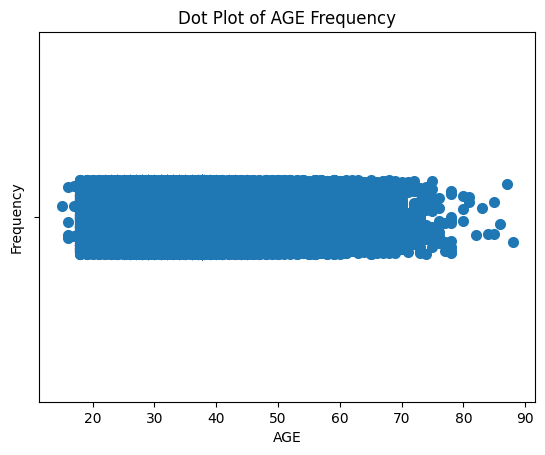

In [43]:


# Assuming df_merged is your DataFrame
# Replace 'df_merged' with the actual name of your DataFrame if it's different

# Choose a categorical column for the dot plot
categorical_column = 'AGE'  # Replace with the actual column name

# Create a dot plot using seaborn
sns.stripplot(x=df_merged[categorical_column], size=8, jitter=True)

# Add labels and title
plt.xlabel(categorical_column)
plt.ylabel('Frequency')
plt.title(f'Dot Plot of {categorical_column} Frequency')

# Show the plot
plt.show()


) missing from current font.Temp\ipykernel_10564\1560841861.py:18: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.g\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


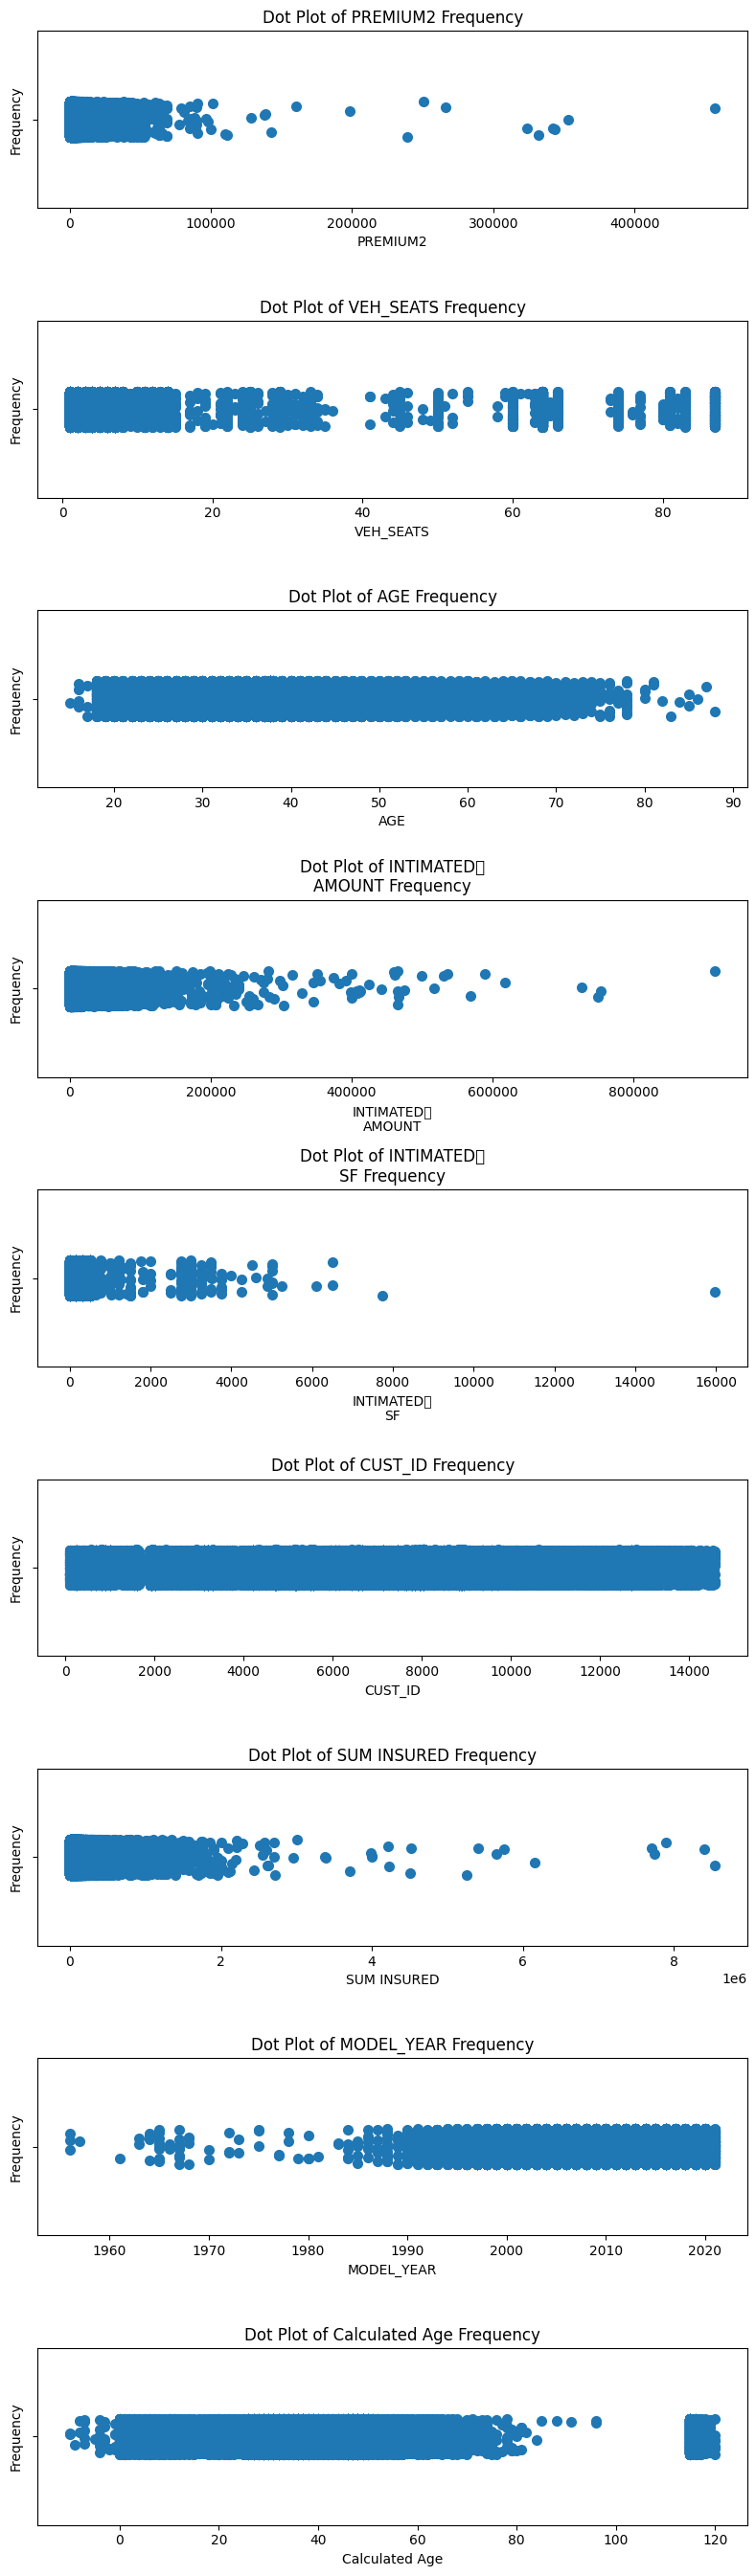

In [44]:


# Assuming df_merged is your DataFrame
# Replace 'df_merged' with the actual name of your DataFrame if it's different

# Get the list of numerical columns
numerical_columns = df_merged.select_dtypes(include='number').columns

# Set up subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 3 * len(numerical_columns)))

# Create dot plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.stripplot(ax=axes[i], x=df_merged[column], size=8, jitter=True)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Dot Plot of {column} Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [45]:
print(set(df_merged.POLICYTYPE))
print(set(policies.POLICYTYPE))
print(set(claims.POLICYTYPE))
df_merged.POLICYTYPE.isna().sum()

{'TP', 'COMP'}
{'TP', 'COMP'}
{'TP', 'COMP'}


0

In [46]:
print(set(df_merged.PRODUCT))
print(set(policies.PRODUCT))
print(set(claims.PRODUCT))
df_merged.PRODUCT.isna().sum()

{'PASSENGER', 'TOURISM', 'LUXURY', 'TP', 'RENT A CAR', 'M 2019', 'M 2.5', 'STANDARD', 'M 2.25', 'NOT CLASSIFIED'}
{'PASSENGER', 'TOURISM', 'LUXURY', 'TP', 'RENT A CAR', 'M 2019', 'M 2.5', 'STANDARD', 'M 2.25', 'NOT CLASSIFIED'}
{'PASSENGER', 'TOURISM', 'LUXURY', 'TP', 'RENT A CAR', 'M 2019', 'M 2.5', 'M 2.25', 'STANDARD', 'NOT CLASSIFIED'}


0

In [47]:
print(set(df_merged.MODEL))
print(set(policies.MODEL))
print(set(claims.MODEL))
df_merged.MODEL.isna().sum()
#drop rows where MODEL is na
df_merged = df_merged.dropna(subset=['MODEL'])
df_merged.MODEL.isna().sum()



{'C200', 'J4', 'PERSONA', 'TERRACAN', 'MG 550', 'P5', 'GRANCABRIO', 'HAYA BUSA', 'WRX SALOON', 'PILOT', 'INFINITI Q50', 'REWARD NP', 'SUV 7', 'H2L VAN', 'GRAND MA', 'XL', 'PRELUDE', 'K5', 'RD SPYDER', 'SC 400', 'CBR 10000 R9', 'MERCURY', 'SCH5022XXYD', 'INFINITI QX56', '230 E', 'TREBOT', 'TIGGO 5', 'RUSH', 'CHARGER.', 'ANAG', '430 I', 'TRUCK P340', 'EADO', 'AVANZA COMMERCIAL', '25', 'AVANTE', 'RAM 4WD', 'LX 600 HL', 'C240', 'SHUMA', 'DYNA', 'FD30T3Z', 'CX 30', 'MKC', '424', '840I', '435 I', 'GLE 63', 'S 450', 'H2000', 'VELOSTER HATCH BACK', 'F430', 'CONTINENTAL', 'A115', 'PARTNER', 'GRAN SPORT', '206CC', '-', 'NATIVA', 'EXTOL', 'CAMARO LT', '307 COUPE', 'TBE 09', 'VZR 1800BZL6', 'FSV', 'VULCAN S ABS', 'DEVILLE', 'L322', 'C 300', 'OUTBACK', 'LEXUS IS 300', '420', 'DL 320', '650S SPIDER', '30DF-7', 'IS 430', '407 COUPE', 'COASTER', '300CE', 'NITRO', 'CIVIC EXI', 'D115A BULLDOSER', '30', 'G 700', 'CAPRICE', 'SZ 150', 'VELAR 2.0 S', 'SAVANNA 2500', 'GLA 200', 'M', 'FH', 'PRADO', 'C3', 'CPD

0

In [48]:
print(set(df_merged.REG))
print(set(policies.REG))
print(set(claims.REG))
print(df_merged.REG.isna().sum())

{'DUBAI ', 'DUBAI L', 'Dubai', 'TBR', 'FUJAIRAH', 'DUBAI K', 'ABU DHABI ', 'ABU DHABI', 'DUBAI  K', 'DUBAI M', 'DUBAI E', 'A D', 'RAK ', 'FUJ', 'DUBAI  G', 'CC 17/1', 'AJMAN ', 'DUBAI     ', 'DUABI', 'T.B.R', 'DUBAI D', 'UAQ', 'DUBAI H', 'DUBAI', 'AJMAN', 'DUBAI  I', 'DUBAI 1871', 'AD', 'SHARJAH', nan, 'DUBAI  L', 'DUBAI  A', 'SHJ ', 'UMQ', 'A.D.', 'DUBAI I', 'SHJ', 'DUBAI  F', 'DUBAI  E', 'DUBAI A ', 'CC', 'DUBAI B', 'RAS', 'Shj', 'SHARJHA', '40298', 'ADH', 'SHJ I', 'RAK', 'A.D', 'DXB ', 'DUBAI - D', 'DUBAI J', 'T B R', 'AL AIN', 'AJ'}
{'DUBAI ', 'DUBAI L', 'Dubai', 'TBR', 'FUJAIRAH', 'DUBAI K', 'ABU DHABI ', 'ABU DHABI', 'DUBAI  K', 'DUBAI M', 'DUBAI E', 'A D', 'RAK ', 'FUJ', 'DUBAI  G', 'CC 17/1', 'AJMAN ', 'DUBAI     ', 'DUABI', 'T.B.R', 'UAQ', 'DUBAI H', 'DUBAI', 'AJMAN', 'DUBAI  I', 'DUBAI 1871', 'AD', 'SHARJAH', nan, 'DUBAI  L', 'DUBAI  A', 'SHJ ', 'UMQ', 'A.D.', 'DUBAI I', 'SHJ', 'DUBAI  F', 'DUBAI  E', 'DUBAI A ', 'CC', 'DUBAI B', 'RAS', 'Shj', 'SHARJHA', '40298', 'ADH', 'RAK'

In [49]:
rename_values = {
    'dubai': 'dubai|duabi',
    'sharjha': 'sharjah|shj',
    'abu dhabi': 'abu dhabi|a.d|ad|a d',
    'ajman': 'ajman|aj',
    'fujairah': 'fujairah|fuj',
    'TBR':'T B R|T.B.R',
    'RAS AL KAHYMA':'RAK|RAS',
    'CC':'CC|CC 17/1'
    
}

for [key, value] in rename_values.items():
    df_merged.loc[df_merged['REG'].str.contains(value, case=False, na=False), 'REG'] = key.upper()

In [50]:
df_merged = df_merged.dropna(subset=['REG'])

clean the date of intimation and date of accidents where date of intimation should not be greater than date of accidents

In [51]:
rows_with_dateOfAccidents_na = df_merged[df_merged['DATE OF \r\nACCIDENT'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]

# Display the result
print(set(df_merged['DATE OF \r\nACCIDENT']))
len(rows_with_dateOfAccidents_na)


{'09/06/2014', '25/05/2019', '10/05/2019', '18/12/2018', '24/06/2017', '30/04/2015', '22/06/2020', '29/05/2016', '12/11/2019', '10/12/2018', '27/09/2020', '02/02/2018', '04/06/2016', '12/04/2015', '06/12/2019', '19/01/2016', '09/10/2016', '15/09/2019', '06/10/2015', '15/09/2020', '06/09/2017', '10/07/2019', '10/07/2018', '20/07/2020', '03/11/2019', '29/01/2016', '01/02/2019', '01/01/2019', '19/05/2019', '27/05/2018', '31/03/2018', '14/09/2017', '20/07/2019', '08/12/2020', '26/02/2017', '27/03/2018', '24/07/2014', '13/09/2016', '20/02/2015', '13/08/2019', '04/01/2018', '09/10/2018', '26/10/2016', '04/01/2016', '28/04/2018', '04/11/2020', '05/07/2016', '03/07/2018', '02/02/2019', '02/05/2020', '19/08/2014', '30/01/2020', '08/07/2018', '04/12/2017', '21/03/2019', '02/09/2017', '13/07/2018', '08/01/2018', '13/05/2019', '24/04/2017', '12/10/2020', '26/10/2019', '03/04/2018', '19/07/2018', '12/06/2019', '07/09/2018', '04/03/2020', '25/12/2018', '16/11/2019', '14/10/2018', '17/05/2020', '05/0

0

In [52]:
# Assuming your DataFrame is named 'df_merged'
df_merged['DATE OF \r\nINTIMATION'] = pd.to_datetime(df_merged['DATE OF \r\nINTIMATION'], format='%d/%m/%Y', errors='coerce')
df_merged['DATE OF \r\nACCIDENT'] = pd.to_datetime(df_merged['DATE OF \r\nACCIDENT'], format='%d/%m/%Y', errors='coerce')


condition = df_merged['DATE OF \r\nINTIMATION'] < df_merged['DATE OF \r\nACCIDENT']

# Swap the dates where the condition is True
df_merged.loc[condition, ['DATE OF \r\nINTIMATION', 'DATE OF \r\nACCIDENT']] = df_merged.loc[condition, ['DATE OF \r\nACCIDENT', 'DATE OF \r\nINTIMATION']].values

print(df_merged[df_merged['DATE OF \r\nINTIMATION'] < df_merged['DATE OF \r\nACCIDENT']])

Empty DataFrame
Columns: [USE_OF_VEHICLE, POLICY_NO, POL_ISSUE_DATE, PREMIUM2, DRV_DLI, VEH_SEATS, DATE OF 
INTIMATION, DATE OF 
ACCIDENT, PLACE OF 
LOSS, CLAIM NO, AGE, TYPE, INTIMATED
AMOUNT, INTIMATED
SF, CUST_ID, EXECUTIVE, MAKE, DRV_DOB, MODEL, SUM INSURED, PRODUCT, POLICYTYPE, NATIONALITY, BODY, REG, POLICY START, POLICY END, CHASSIS_NO, MODEL_YEAR, Calculated Age]
Index: []


In [53]:
df_merged['DATE OF \r\nINTIMATION'] = df_merged['DATE OF \r\nINTIMATION'].dt.strftime('%d/%m/%Y')
df_merged['DATE OF \r\nACCIDENT'] = df_merged['DATE OF \r\nACCIDENT'].dt.strftime('%d/%m/%Y')
df_merged['DRV_DLI'] = df_merged['DATE OF \r\nACCIDENT'].dt.strftime('%d/%m/%Y')

AttributeError: Can only use .dt accessor with datetimelike values

cleaning date of intimation

In [ ]:
rows_with_dateOfintimation_na = df_merged[df_merged['DATE OF \r\nINTIMATION'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]

# Display the result
print(set(df_merged['DATE OF \r\nINTIMATION']))
len(rows_with_dateOfintimation_na)

{'11/01/2017', '07/02/2016', '21/03/2017', '22/09/2015', '08/12/2020', '23/08/2017', '07/11/2018', '22/11/2016', '16/04/2020', '27/08/2017', '25/07/2019', '26/08/2020', '19/11/2020', '24/12/2015', '27/03/2018', '20/08/2015', '23/02/2015', '24/10/2015', '11/02/2020', '13/07/2019', '11/12/2018', '18/10/2020', '01/08/2019', '30/07/2015', '22/08/2019', '27/05/2015', '05/07/2016', '26/03/2017', '14/01/2016', '10/04/2018', '16/08/2020', '12/07/2015', '02/01/2020', '25/01/2015', '25/03/2015', '24/06/2015', '18/05/2017', '17/03/2016', '20/09/2018', '17/04/2018', '08/03/2015', '10/09/2017', '13/04/2020', '30/04/2020', '06/04/2020', '26/07/2016', '25/09/2016', '04/05/2016', '10/12/2017', '04/01/2016', '05/02/2017', '08/04/2018', '26/11/2020', '30/10/2016', '28/08/2016', '25/10/2017', '27/04/2017', '03/04/2017', '07/11/2016', '06/08/2017', '24/04/2016', '12/11/2017', '01/09/2018', '02/10/2019', '15/01/2018', '31/03/2020', '18/06/2017', '24/01/2016', '21/04/2019', '07/03/2019', '23/07/2018', '18/0

0

cleaning driver driving license issue

In [ ]:
print(df_merged['DRV_DLI'].isna().sum())
rows_with_DRVDLI_na = df_merged[df_merged['DRV_DLI'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]

# Display the result
print(set(df_merged['DRV_DLI']))
len(rows_with_DRVDLI_na)

19747
{NaT, Timestamp('2019-11-16 00:00:00'), Timestamp('1991-07-23 00:00:00'), Timestamp('1995-12-26 00:00:00'), Timestamp('1992-01-06 00:00:00'), Timestamp('1985-06-13 00:00:00'), Timestamp('1971-10-01 00:00:00'), Timestamp('2003-08-26 00:00:00'), Timestamp('1975-11-12 00:00:00'), Timestamp('2008-11-13 00:00:00'), Timestamp('1990-03-18 00:00:00'), Timestamp('2002-10-28 00:00:00'), Timestamp('1994-08-25 00:00:00'), Timestamp('1990-02-06 00:00:00'), Timestamp('1997-04-08 00:00:00'), Timestamp('1998-07-12 00:00:00'), Timestamp('2009-06-13 00:00:00'), Timestamp('1981-10-25 00:00:00'), Timestamp('2005-12-24 00:00:00'), Timestamp('2000-08-23 00:00:00'), Timestamp('2011-04-24 00:00:00'), Timestamp('2014-11-07 00:00:00'), Timestamp('1977-11-10 00:00:00'), Timestamp('2019-07-18 00:00:00'), Timestamp('2004-08-03 00:00:00'), Timestamp('2011-10-02 00:00:00'), Timestamp('2016-11-14 00:00:00'), Timestamp('2010-06-02 00:00:00'), Timestamp('2002-04-05 00:00:00'), Timestamp('2002-04-20 00:00:00'), Ti

7730

In [ ]:
cleaned_columns={'AGE' , 'DRV_DOB' ,'DATE OF \r\nINTIMATION', 'VEH_SEATS' , 'SUM INSURED' , 'MODEL_YEAR','PREMIUM2' ,'MAKE','BODY','INTIMATED\r\nAMOUNT','DATE OF \r\nACCIDENT','POLICYTYPE','PRODUCT','MODEL','REG' }
to_drop_columns ={'CHASSIS_NO' , 'CLAIM NO' , 'CUST_ID','Calculated Age','EXECUTIVE','POL_ISSUE_DATE','NATIONALITY'}
rest = set(df_merged.columns) - cleaned_columns - to_drop_columns
rest

{'DRV_DLI',
 'INTIMATED\r\nSF',
 'PLACE OF \r\nLOSS',
 'POLICY END',
 'POLICY START',
 'POLICY_NO',
 'TYPE',
 'USE_OF_VEHICLE'}

In [ ]:
print(df_merged['POLICY START'].isna().sum())

0


In [72]:
print(df_merged['DRV_DLI'].isna().sum())
df_merged['DRV_DLI_AGE'] = np.where(df_merged['DRV_DLI'] == "NaT", np.nan, (pd.to_datetime(df_merged['POLICY START'], format='%d/%m/%Y', errors='coerce') - pd.to_datetime(df_merged['DRV_DLI'], format='%d/%m/%Y', errors='coerce')).dt.days / 365.25)
mean_age = df_merged.groupby('AGE')['DRV_DLI_AGE'].mean().to_dict()
print(mean_age)
# print(df_merged['DRV_DLI'])
# df_merged[df_merged['DRV_DLI_AGE'].isna() & ~df_merged[list(unique_columns_claims)].isna().all(axis=1)]
values_array = np.array(list(mean_age.values()))
keys_with_nan = [key for key, value in mean_age.items() if pd.isna(value) or value == 0.0]
print(len(keys_with_nan))
print(keys_with_nan)
df_merged = df_merged[~df_merged['AGE'].isin(keys_with_nan)]
mean_age 
df_merged['DRV_DLI_AGE'].describe()


19673
{16.0: 12.544832306639288, 17.0: 17.15811088295688, 18.0: 20.148068629347847, 19.0: 15.676356154813751, 20.0: 14.52779022781837, 21.0: 14.107457352708893, 22.0: 13.199817579502232, 23.0: 13.565673936209263, 24.0: 12.98871938698853, 25.0: 12.759712173598794, 26.0: 11.580413117801136, 27.0: 11.48416409446301, 28.0: 11.539847365541386, 29.0: 11.276664838352616, 30.0: 11.782168210991689, 31.0: 11.436246132923275, 32.0: 11.781320733563554, 33.0: 12.1574411549773, 34.0: 12.112094792473155, 35.0: 12.634778525170493, 36.0: 12.431830351454874, 37.0: 12.868724903811543, 37.706577795076385: 13.777544449633636, 38.0: 13.435616579781101, 39.0: 13.570538288016243, 40.0: 13.461600888778312, 41.0: 14.094707031127353, 42.0: 14.430325805636269, 43.0: 14.31104038329911, 44.0: 14.715218899904214, 45.0: 15.048056486184661, 46.0: 14.82093137627703, 47.0: 15.214380008048673, 48.0: 15.461618582589924, 49.0: 15.672947014965843, 50.0: 16.480317614447063, 51.0: 16.526016473041818, 52.0: 17.41202171839148, 

count    218536.000000
mean         13.716858
std           9.629267
min        -185.842574
25%           6.335387
50%          13.279945
75%          17.869952
max         145.177276
Name: DRV_DLI_AGE, dtype: float64

In [78]:

df_merged['DRV_DLI_AGE'] = df_merged.apply(lambda row: mean_age.get(row['AGE']) if pd.isna(
    row['DRV_DLI_AGE']) or row['DRV_DLI_AGE'] < 1.0 or row['DRV_DLI_AGE'] > 60.0  else row['DRV_DLI_AGE'], axis=1)
print(df_merged['DRV_DLI_AGE'].isna().sum())
print(df_merged[~df_merged[list(unique_columns_claims)].isna().all(axis=1)]['DRV_DLI_AGE'].isna().sum())
print(df_merged['DRV_DLI_AGE'].describe())

16174
0
count    222036.000000
mean         14.036260
std           9.067378
min           1.002053
25%           6.792608
50%          13.702943
75%          17.763176
max          59.964408
Name: DRV_DLI_AGE, dtype: float64
